In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier\n",
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split # Import train_test_split function\n",
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation\n",
from sklearn.model_selection import cross_val_score

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "C:\\Users\\"]).decode("utf8"))

In [147]:
data_dir = 'C:\\Users\\Shibly\\Desktop\\Spring2020\\CS_895\\mens-machine-learning-competition-2019\\Stage2DataFiles\\'
df_seeds = pd.read_csv(data_dir + 'NCAATourneySeeds.csv')
df_tour = pd.read_csv(data_dir + 'NCAATourneyCompactResults.csv')

In [148]:
df_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [149]:
df_tour.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [150]:
def seed_to_int(seed):
    #Get just the digits from the seeding. Return as int
    s_int = int(seed[1:3])
    return s_int
df_seeds['seed_int'] = df_seeds.Seed.apply(seed_to_int)
df_seeds.drop(labels=['Seed'], inplace=True, axis=1) # This is the string label
df_seeds.head()

,Season,TeamID,seed_int
0,1985,1207,1
1,1985,1210,2
2,1985,1228,3
3,1985,1260,4
4,1985,1374,5


In [151]:
df_tour.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT'],
      dtype='object')

In [152]:
df_tour.drop(labels=['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)
df_tour.head()

,Season,WTeamID,LTeamID
0,1985,1116,1234
1,1985,1120,1345
2,1985,1207,1250
3,1985,1229,1425
4,1985,1242,1325


In [153]:
df_winseeds = df_seeds.rename(columns={'TeamID':'WTeamID', 'seed_int':'WSeed'})
df_lossseeds = df_seeds.rename(columns={'TeamID':'LTeamID', 'seed_int':'LSeed'})
df_dummy = pd.merge(left=df_tour, right=df_winseeds, how='left', on=['Season', 'WTeamID'])
df_concat = pd.merge(left=df_dummy, right=df_lossseeds, on=['Season', 'LTeamID'])
df_concat['SeedDiff'] = df_concat.WSeed - df_concat.LSeed
df_concat.head()

,Season,WTeamID,LTeamID,WSeed,LSeed,SeedDiff
0,1985,1116,1234,9,8,1
1,1985,1120,1345,11,6,5
2,1985,1207,1250,1,16,-15
3,1985,1229,1425,9,8,1
4,1985,1242,1325,3,14,-11


In [154]:
df_wins = pd.DataFrame()
df_wins['SeedDiff'] = df_concat['SeedDiff']
df_wins['Result'] = 1

df_losses = pd.DataFrame()
df_losses['SeedDiff'] = -df_concat['SeedDiff']
df_losses['Result'] = 0

df_predictions = pd.concat((df_wins, df_losses))
df_predictions.head()

,SeedDiff,Result
0,1,1
1,5,1
2,-15,1
3,1,1
4,-11,1


In [155]:
X_train = df_predictions.SeedDiff.values.reshape(-1,1)
y_train = df_predictions.Result.values
#X_train, y_train = shuffle(X_train, y_train)

In [156]:
# Split dataset into training set and test set\n",
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1) # 70% training and 30% test"

In [157]:
# Create Random Forest classifer object\n",
clf = RandomForestClassifier(n_estimators=2000, random_state=0)
# Train Random Forest Classifer\n",
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset\n",
y_pred = clf.predict(X_test)

In [158]:
# Model Accuracy, how often is the classifier correct?\n",
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7124332570556827


Text(0, 0.5, 'P(Team1 will win)')

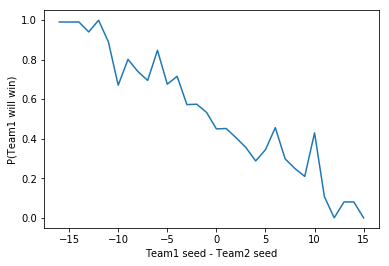

In [159]:
X = np.arange(-16, 16).reshape(-1, 1)
preds = clf.predict_proba(X)[:,1]

plt.plot(X, preds)
plt.xlabel('Team1 seed - Team2 seed')
plt.ylabel('P(Team1 will win)')

In [160]:
data_dir2='C:\\Users\\Shibly\\Desktop\\Spring2020\\CS_895\\mens-machine-learning-competition-2019\\'
df_sample_sub = pd.read_csv(data_dir2 + 'SampleSubmissionStage2.csv')
n_test_games = len(df_sample_sub)

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

In [161]:
df_seeds

,Season,TeamID,seed_int
0,1985,1207,1
1,1985,1210,2
2,1985,1228,3
3,1985,1260,4
4,1985,1374,5
5,1985,1208,6
6,1985,1393,7
7,1985,1396,8
8,1985,1439,9
9,1985,1177,10


In [162]:
X_test = np.zeros(shape=(n_test_games, 1))
for ii, row in df_sample_sub.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
    t1_seed = df_seeds[(df_seeds.TeamID == t1) & (df_seeds.Season == year)].seed_int.values[0]
    t2_seed = df_seeds[(df_seeds.TeamID == t2) & (df_seeds.Season == year)].seed_int.values[0]
    diff_seed = t1_seed - t2_seed
    X_test[ii, 0] = diff_seed


In [164]:
preds = clf.predict_proba(X_test)[:,1]

clipped_preds = np.clip(preds, 0.05, 0.95)
df_sample_sub.Pred = clipped_preds
df_sample_sub.head()

,ID,Pred
0,2019_1101_1113,0.287826
1,2019_1101_1120,0.429602
2,2019_1101_1124,0.456157
3,2019_1101_1125,0.287826
4,2019_1101_1133,0.449737


In [165]:
df_sample_sub.to_csv('logreg_seed_starter_2019_RF.csv', index=False)

In [167]:
from bracketeer import build_bracket 

m = build_bracket(outputPath = 'bracket_RF_19.png',
	teamsPath = r'C:\Users\Shibly\Desktop\Spring2020\CS_895\mens-machine-learning-competition-2019\Stage2DataFiles\Teams.csv',
	seedsPath = r'C:\Users\Shibly\Desktop\Spring2020\CS_895\mens-machine-learning-competition-2019\Stage2DataFiles\NCAATourneySeeds.csv',
	submissionPath = r'C:\Users\Shibly\logreg_seed_starter_2019_RF.csv',
	slotsPath = r'C:\Users\Shibly\Desktop\Spring2020\CS_895\mens-machine-learning-competition-2019\Stage2DataFiles\NCAATourneySlots.csv',
	year = 2019)

# output feedback
print()
print()
print("2019 Bracket creation using RF complete.")
print()
print()



2019 Bracket creation using RF complete.




In [30]:
#logistic regresssion

2019

In [ ]:
logreg = LogisticRegression()
params = {'C': np.logspace(start=-5, stop=3, num=9)}
clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

In [168]:
# Split dataset into training set and test set\n",
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [169]:
# import the class\n",
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)\n",
logreg = LogisticRegression()
# fit the model with data\n",
logreg.fit(X_train,y_train)
# Prediction\n",
y_pred=logreg.predict(X_test)

C:\Users\Shibly\AppData\Local\conda\conda\envs\Keras2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [170]:
# Model Accuracy, how often is the classifier correct?\n",
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7156862745098039


In [171]:
logreg = LogisticRegression()
params = {'C': np.logspace(start=-5, stop=3, num=9)}
clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best log_loss: -0.5525, with best C: 0.1


C:\Users\Shibly\AppData\Local\conda\conda\envs\Keras2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Shibly\AppData\Local\conda\conda\envs\Keras2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shibly\AppData\Local\conda\conda\envs\Keras2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shibly\AppData\Local\conda\conda\envs\Keras2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shib

Text(0, 0.5, 'P(Team1 will win)')

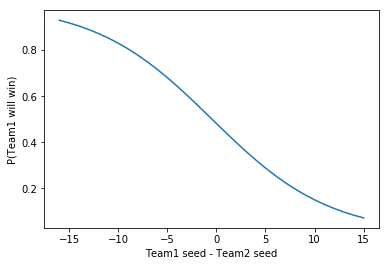

In [172]:
X = np.arange(-16, 16).reshape(-1, 1)
preds = clf.predict_proba(X)[:,1]

plt.plot(X, preds)
plt.xlabel('Team1 seed - Team2 seed')
plt.ylabel('P(Team1 will win)')

In [175]:
data_dir2='C:\\Users\\Shibly\\Desktop\\Spring2020\\CS_895\\mens-machine-learning-competition-2019\\'
df_sample_sub = pd.read_csv(data_dir2 + 'SampleSubmissionStage2.csv')
n_test_games = len(df_sample_sub)

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

In [176]:
X_test = np.zeros(shape=(n_test_games, 1))
for ii, row in df_sample_sub.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
    t1_seed = df_seeds[(df_seeds.TeamID == t1) & (df_seeds.Season == year)].seed_int.values[0]
    t2_seed = df_seeds[(df_seeds.TeamID == t2) & (df_seeds.Season == year)].seed_int.values[0]
    diff_seed = t1_seed - t2_seed
    X_test[ii, 0] = diff_seed


In [177]:
preds = clf.predict_proba(X_test)[:,1]

clipped_preds = np.clip(preds, 0.05, 0.95)
df_sample_sub.Pred = clipped_preds
df_sample_sub.head()

,ID,Pred
0,2019_1101_1113,0.323403
1,2019_1101_1120,0.149964
2,2019_1101_1124,0.255325
3,2019_1101_1125,0.323403
4,2019_1101_1133,0.481581


In [178]:
df_sample_sub.to_csv('logreg_seed_starter_2019_logreg.csv', index=False)

In [179]:
from bracketeer import build_bracket 

m = build_bracket(outputPath = 'bracket_lg_19.png',
	teamsPath = r'C:\Users\Shibly\Desktop\Spring2020\CS_895\mens-machine-learning-competition-2019\Stage2DataFiles\Teams.csv',
	seedsPath = r'C:\Users\Shibly\Desktop\Spring2020\CS_895\mens-machine-learning-competition-2019\Stage2DataFiles\NCAATourneySeeds.csv',
	submissionPath = r'C:\Users\Shibly\logreg_seed_starter_2019_logreg.csv',
	slotsPath = r'C:\Users\Shibly\Desktop\Spring2020\CS_895\mens-machine-learning-competition-2019\Stage2DataFiles\NCAATourneySlots.csv',
	year = 2019)

# output feedback
print()
print()
print("2019 Bracket creation using RF complete.")
print()
print()



2019 Bracket creation using RF complete.




In [180]:
##svm
# Split dataset into training set and test set\n",
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=6) # 70% training and 30% test"

In [181]:
 # Create SVM\n",
svc = LinearSVC()
# Train SVM\n",
svc = svc.fit(X_train,y_train)
#Predict the response for test dataset\n",
y_pred = svc.predict(X_test)

C:\Users\Shibly\AppData\Local\conda\conda\envs\Keras2\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [182]:
# Model Accuracy, how often is the classifier correct?\n",
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6993769470404985


In [183]:
data_dir2='C:\\Users\\Shibly\\Desktop\\Spring2020\\CS_895\\mens-machine-learning-competition-2019\\'
df_sample_sub = pd.read_csv(data_dir2 + 'SampleSubmissionStage2.csv')
n_test_games = len(df_sample_sub)

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

In [184]:
X_test = np.zeros(shape=(n_test_games, 1))
for ii, row in df_sample_sub.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
    t1_seed = df_seeds[(df_seeds.TeamID == t1) & (df_seeds.Season == year)].seed_int.values[0]
    t2_seed = df_seeds[(df_seeds.TeamID == t2) & (df_seeds.Season == year)].seed_int.values[0]
    diff_seed = t1_seed - t2_seed
    X_test[ii, 0] = diff_seed


In [185]:
preds = svc._predict_proba_lr(X_test)[:,1]

clipped_preds = np.clip(preds, 0.05, 0.95)
df_sample_sub.Pred = clipped_preds
df_sample_sub.head()

,ID,Pred
0,2019_1101_1113,0.424895
1,2019_1101_1120,0.333350
2,2019_1101_1124,0.393450
3,2019_1101_1125,0.424895
4,2019_1101_1133,0.489384


In [186]:
df_sample_sub.to_csv('logreg_seed_starter_2019_SVM.csv', index=False)

In [187]:
from bracketeer import build_bracket 

m = build_bracket(outputPath = 'bracket_svm_19.png',
	teamsPath = r'C:\Users\Shibly\Desktop\Spring2020\CS_895\mens-machine-learning-competition-2019\Stage2DataFiles\Teams.csv',
	seedsPath = r'C:\Users\Shibly\Desktop\Spring2020\CS_895\mens-machine-learning-competition-2019\Stage2DataFiles\NCAATourneySeeds.csv',
	submissionPath = r'C:\Users\Shibly\logreg_seed_starter_2019_SVM.csv',
	slotsPath = r'C:\Users\Shibly\Desktop\Spring2020\CS_895\mens-machine-learning-competition-2019\Stage2DataFiles\NCAATourneySlots.csv',
	year = 2019)

# output feedback
print()
print()
print("2019 Bracket creation using RF complete.")
print()
print()



2019 Bracket creation using RF complete.


